In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [308]:
import warnings
warnings.filterwarnings('ignore')

In [309]:
#Importing the dataset
df = pd.read_csv("Randomforest.csv")

In [312]:
#View the dimensions
df.shape

(249, 20)

In [311]:
#top 5 rows
df.head()

,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url
0,1,Kid Pasta,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,Grilled,47,56,4.4,0,https://example.com/images/meal_1.jpg
1,2,Husband Rice,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,38.6,423,7,317,Roasted,51,34,2.4,0,https://example.com/images/meal_2.jpg
2,3,Activity Rice,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,Boiled,58,29,4.3,0,https://example.com/images/meal_3.jpg
3,4,Another Salad,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,41.7,846,107,499,Grilled,14,81,4.6,0,https://example.com/images/meal_4.jpg
4,5,Quite Stew,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,Raw,47,105,4.3,0,https://example.com/images/meal_5.jpg


In [313]:
#Drop unnecessary columns
df.drop(['meal_id','image_url','prep_time_min','cook_time_min'],axis=1,inplace=True)

In [314]:
#preview the changes
df.head()

,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,rating,is_healthy
0,Kid Pasta,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,Grilled,4.4,0
1,Husband Rice,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,38.6,423,7,317,Roasted,2.4,0
2,Activity Rice,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,Boiled,4.3,0
3,Another Salad,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,41.7,846,107,499,Grilled,4.6,0
4,Quite Stew,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,Raw,4.3,0


In [315]:
#Summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   meal_name       249 non-null    object 
 1   cuisine         249 non-null    object 
 2   meal_type       249 non-null    object 
 3   diet_type       249 non-null    object 
 4   calories        249 non-null    int64  
 5   protein_g       249 non-null    float64
 6   carbs_g         249 non-null    float64
 7   fat_g           249 non-null    float64
 8   fiber_g         249 non-null    float64
 9   sugar_g         249 non-null    float64
 10  sodium_mg       249 non-null    int64  
 11  cholesterol_mg  249 non-null    int64  
 12  serving_size_g  249 non-null    int64  
 13  cooking_method  249 non-null    object 
 14  rating          249 non-null    float64
 15  is_healthy      249 non-null    int64  
dtypes: float64(6), int64(5), object(5)
memory usage: 31.3+ KB


In [316]:
#Checking the frequency of categroical variables
col_names = ['meal_name','cuisine','meal_type','diet_type']
for col in col_names:
    print(df[col].value_counts())

meal_name
Thing Rice            2
Add Wrap              2
Bill Stew             2
Challenge Sandwich    2
Husband Rice          1
                     ..
Box Sandwich          1
Choose Wrap           1
Method Stew           1
Outside Sandwich      1
Worker Stew           1
Name: count, Length: 245, dtype: int64
cuisine
Mediterranean    36
American         36
Indian           30
Mexican          30
Chinese          30
Italian          30
Japanese         30
Thai             27
Name: count, dtype: int64
meal_type
Lunch        67
Breakfast    66
Dinner       63
Snack        53
Name: count, dtype: int64
diet_type
Vegetarian    43
Low-Carb      43
Vegan         42
Balanced      41
Paleo         40
Keto          40
Name: count, dtype: int64


In [317]:
#Displaying our target variable
df['is_healthy'].value_counts()

is_healthy
0    222
1     27
Name: count, dtype: int64

In [318]:
#check missing values in varaibles
df.isnull().sum()

meal_name         0
cuisine           0
meal_type         0
diet_type         0
calories          0
protein_g         0
carbs_g           0
fat_g             0
fiber_g           0
sugar_g           0
sodium_mg         0
cholesterol_mg    0
serving_size_g    0
cooking_method    0
rating            0
is_healthy        0
dtype: int64

In [319]:
#Declaring feature vector and target variable

X = df.drop(['is_healthy'], axis = 1)

y = df['is_healthy']

In [320]:
#Splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 50)

In [321]:
#check the shape of X_train and X_test

X_train.shape, X_test.shape

((166, 15), (83, 15))

In [325]:
#Check data types in X_train

X_train.dtypes

meal_name          object
cuisine            object
meal_type          object
diet_type          object
calories            int64
protein_g         float64
carbs_g           float64
fat_g             float64
fiber_g           float64
sugar_g           float64
sodium_mg           int64
cholesterol_mg      int64
serving_size_g      int64
cooking_method     object
rating            float64
dtype: object

In [326]:
#Encoding categorical variables

X_train.head()

,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,rating
61,Heavy Stew,Italian,Dinner,Paleo,417,35.6,123.3,3.3,29.4,49.7,2341,232,469,Roasted,2.1
142,Return Curry,American,Lunch,Low-Carb,778,69.5,0.8,36.5,20.6,1.8,1460,293,419,Grilled,5.0
178,Glass Salad,Mediterranean,Dinner,Low-Carb,881,21.0,20.7,13.9,12.5,36.8,2177,282,398,Baked,4.1
100,Week Stew,Italian,Dinner,Keto,1145,15.4,55.2,51.3,27.6,19.2,1104,238,102,Boiled,4.1
186,Your Pasta,Italian,Lunch,Vegan,671,56.1,88.1,15.9,16.0,43.3,50,290,354,Grilled,2.9


In [327]:
#importing category encoders
import category_encoders as ce

In [328]:
encoder = ce.OneHotEncoder(cols = ['meal_name','cuisine','meal_type','diet_type','cooking_method'], use_cat_names=True)


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

from sklearn.preprocessing import LabelEncoder

cat_cols = X_train.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

In [329]:
X_train.head()

,meal_name_Heavy Stew,meal_name_Return Curry,meal_name_Glass Salad,meal_name_Week Stew,meal_name_Your Pasta,meal_name_Eight Wrap,meal_name_Decide Salad,meal_name_Pull Stew,meal_name_Clearly Salad,meal_name_Actually Rice,...,cholesterol_mg,serving_size_g,cooking_method_Roasted,cooking_method_Grilled,cooking_method_Baked,cooking_method_Boiled,cooking_method_Fried,cooking_method_Steamed,cooking_method_Raw,rating
61,1,0,0,0,0,0,0,0,0,0,...,232,469,1,0,0,0,0,0,0,2.1
142,0,1,0,0,0,0,0,0,0,0,...,293,419,0,1,0,0,0,0,0,5.0
178,0,0,1,0,0,0,0,0,0,0,...,282,398,0,0,1,0,0,0,0,4.1
100,0,0,0,1,0,0,0,0,0,0,...,238,102,0,0,0,1,0,0,0,4.1
186,0,0,0,0,1,0,0,0,0,0,...,290,354,0,1,0,0,0,0,0,2.9


In [330]:
X_test.head()

,meal_name_Heavy Stew,meal_name_Return Curry,meal_name_Glass Salad,meal_name_Week Stew,meal_name_Your Pasta,meal_name_Eight Wrap,meal_name_Decide Salad,meal_name_Pull Stew,meal_name_Clearly Salad,meal_name_Actually Rice,...,cholesterol_mg,serving_size_g,cooking_method_Roasted,cooking_method_Grilled,cooking_method_Baked,cooking_method_Boiled,cooking_method_Fried,cooking_method_Steamed,cooking_method_Raw,rating
98,0,0,0,0,0,0,0,0,0,0,...,58,112,0,0,0,1,0,0,0,3.6
16,0,0,0,0,0,0,0,0,0,0,...,136,233,0,0,0,0,0,1,0,4.2
225,0,0,0,0,0,0,0,0,0,0,...,122,307,0,0,1,0,0,0,0,3.9
20,0,0,0,0,0,0,0,0,0,0,...,281,365,0,0,0,0,0,0,1,1.7
149,0,0,0,0,0,0,0,0,0,0,...,107,306,0,1,0,0,0,0,0,4.4


In [331]:
#Now importing XGBoost Classifier
from xgboost import XGBClassifier

#making an instance of the model

xgbc = XGBClassifier(n_estimators= 11, random_state = 0)
#Testing with 12 Decision Trees


#fit the model
xgbc.fit(X_train, y_train)


#Predicting the Test set results

y_pred = xgbc.predict(X_test)

#CHeck accuracy score

from sklearn.metrics import accuracy_score

print('model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

model accuracy score: 0.9880


In [332]:
#Again making the instance of model with 100 Decision Trees

rfc_100 = XGBClassifier(n_estimators=100, random_state = 0)

#fit the model to the training set
rfc_100.fit(X_train, y_train)

#predict the test set results
y_pred_100 = rfc_100.predict(X_test)


#Check accuracy score
print("Model accuracy score with 100 Decision Trees: {0:0.4f}".format(accuracy_score(y_test, y_pred_100 )))

Model accuracy score with 100 Decision Trees: 0.9880


In [333]:
#Create the classifier with n_estimators = 100

clf = XGBClassifier(n_estimators=100, random_state=0)


#fit the model to the training set

clf.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [336]:
#view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores
#Highilight the important features

sugar_g                   0.530251
fat_g                     0.319468
calories                  0.104275
serving_size_g            0.030611
carbs_g                   0.008320
                            ...   
cooking_method_Boiled     0.000000
cooking_method_Fried      0.000000
cooking_method_Steamed    0.000000
cooking_method_Raw        0.000000
rating                    0.000000
Length: 198, dtype: float32

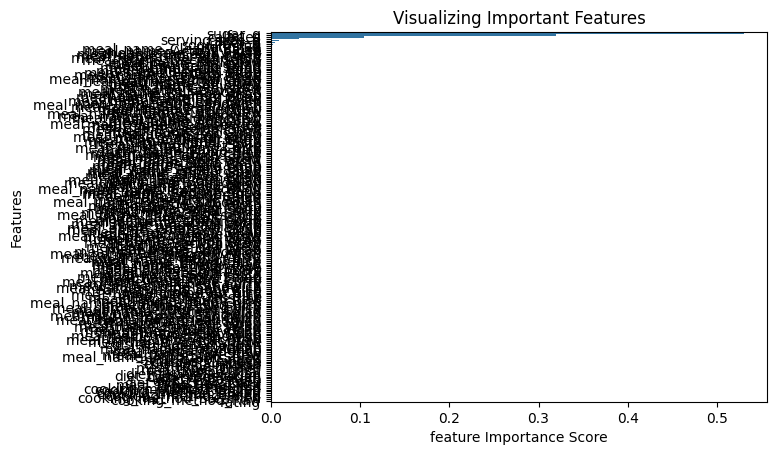

In [342]:
#visualizing the feature scores with a bar plot

#creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)


#Add labels to the graph

plt.xlabel("feature Importance Score")
plt.ylabel("Features")


#Adding title to the graph
plt.title("Visualizing Important Features")

#Visualize the graph
plt.show()

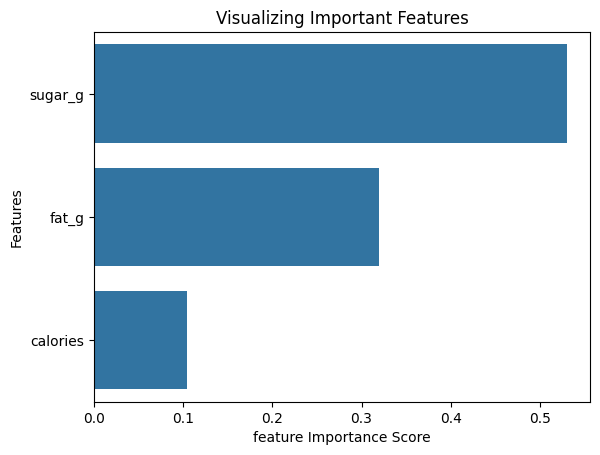

In [343]:
#For displaying the plot of the Important features only
filtered_scores = feature_scores[feature_scores > 0.05]
sns.barplot(x=filtered_scores,y=filtered_scores.index)

plt.xlabel("feature Importance Score")
plt.ylabel("Features")


#Adding title to the graph
plt.title("Visualizing Important Features")

#Visualize the graph
plt.show()

In [ ]:
#Declare feature vector and target variable(for the least important feature to drop)

X = df.drop(["is_healthy","fiber_g"], axis=1)

y=df['is_healthy']

df = df[~df.apply(lambda row: row.astype(str).str.contains('Member Curry').any(), axis=1)]

In [339]:
#Split data into training and testing sets

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)



In [340]:
#Again making the instance of model with 100 Decision Trees

rfc_100 = XGBClassifier(n_estimators=100, random_state = 0)

#fit the model to the training set
rfc_100.fit(X_train, y_train)

#predict the test set results
y_pred_100 = rfc_100.predict(X_test)


#Check accuracy score
print("Model accuracy score with 100 Decision Trees: {0:0.4f}".format(accuracy_score(y_test, y_pred_100 )))

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:meal_name: object, cuisine: object, meal_type: object, diet_type: object, cooking_method: object

In [ ]:
# Predict on training set
y_train_pred = rfc_100.predict(X_train)

# Training accuracy
print("Model training set score: {0:0.4f}".format(accuracy_score(y_train, y_train_pred)))



NotFittedError: need to call fit or load_model beforehand

In [ ]:
#Solving the underfitting problem
from sklearn.model_selection import GridSearchCV


param_grid_xgb = {
    'n_estimators': [100, 200, 300], #number of trees
    'max_depth': [5, 10, 15, None], #maximum depth of tree
    'min_samples_split': [2, 5, 10], #minimum extent of splitting at the node
    'min_samples_leaf': [1, 2, 4],   #mimum sample required at the leaf
}

#Using Grid search for finding the best Parameter.
grid_search = GridSearchCV(estimator=xgbc, param_grid_xgb=param_grid_xgb,
                           cv=5, # 5 CrossFold-Validation
                           n_jobs=-1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'param_grid_xgb'. Did you mean 'param_grid'?

In [ ]:
#getting the best model for the test score

from xgboost import XGBClassifier

best_params = grid_search.best_params_

rfc_best = XGBClassifier(**best_params, random_state=0)
rfc_best.fit(X_train, y_train)

# Check train and test accuracy
train_acc = rfc_best.score(X_train, y_train)
test_acc = rfc_best.score(X_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


NameError: name 'grid_search' is not defined

In [ ]:
#Confusion Matrix

#printing the Confusion Matrix and part it into four pieces

from sklearn.metrics import confusion_matrix


# Predictions from the final tuned model
y_test_pred = rfc_best.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

print("Confusion matrix\n\n", cm)

NameError: name 'rfc_best' is not defined

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

NameError: name 'cm' is not defined

In [ ]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

NameError: name 'y_test_pred' is not defined

In [ ]:
# XGBoost imports and ROC utilities
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Baseline XGBoost model
xgbc = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
xgbc.fit(X_train, y_train)
y_proba = xgbc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print('Baseline XGBoost AUC:', roc_auc)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Baseline XGB (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline XGBoost')
plt.legend(loc='lower right')
plt.show()


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:meal_name: object, cuisine: object, meal_type: object, diet_type: object, cooking_method: object

In [ ]:
# Hyperparameter tuning for XGBoost using GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1),
                               param_grid=param_grid_xgb,
                               cv=5,
                               scoring='roc_auc',
                               n_jobs=-1,
                               verbose=1)
grid_search_xgb.fit(X_train, y_train)
print('Best params:', grid_search_xgb.best_params_)
print('Best CV score (AUC):', grid_search_xgb.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


ValueError: 
All the 1215 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 407, in pandas_feature_info
    new_feature_types.append(_pandas_dtype_mapper[dtype.name])
                             ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'object'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 774, in inner_f
    return func(**kwargs)
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 1784, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ~~~~~~~~~~~~~~~~~~~~~~~~~^
        missing=self.missing,
        ^^^^^^^^^^^^^^^^^^^^^
    ...<14 lines>...
        feature_types=feature_types,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 701, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
        data=X,
    ...<9 lines>...
        ref=None,
    )
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 1254, in _create_dmatrix
    return QuantileDMatrix(
        **kwargs, ref=ref, nthread=self.n_jobs, max_bin=self.max_bin
    )
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 774, in inner_f
    return func(**kwargs)
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 1768, in __init__
    self._init(
    ~~~~~~~~~~^
        data,
        ^^^^^
    ...<12 lines>...
        max_quantile_blocks=max_quantile_batches,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 1832, in _init
    it.reraise()
    ~~~~~~~~~~^^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 598, in _handle_exception
    return fn()
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ~~~~~~~~~^^^^^^^^^^^^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 1632, in next
    input_data(**self.kwargs)
    ~~~~~~~~~~^^^^^^^^^^^^^^^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 774, in inner_f
    return func(**kwargs)
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 665, in input_data
    new, feature_names, feature_types = _proxy_transform(
                                        ~~~~~~~~~~~~~~~~^
        data,
        ^^^^^
    ...<2 lines>...
        self._enable_categorical,
        ^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 1685, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ~~~~~~~~~~~~~~~~~~~~^
        data, enable_categorical, feature_names, feature_types
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 662, in _transform_pandas_df
    feature_names, feature_types = pandas_feature_info(
                                   ~~~~~~~~~~~~~~~~~~~^
        data, meta, feature_names, feature_types, enable_categorical
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 409, in pandas_feature_info
    _invalid_dataframe_dtype(data)
    ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "c:\Users\thoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 372, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:meal_name: object, cuisine: object, meal_type: object, diet_type: object, cooking_method: object


In [ ]:
# Evaluate best estimator and plot ROC after tuning
best_xgb = grid_search_xgb.best_estimator_
y_proba_best = best_xgb.predict_proba(X_test)[:,1]
fpr_b, tpr_b, _ = roc_curve(y_test, y_proba_best)
roc_auc_b = auc(fpr_b, tpr_b)
print('Tuned XGBoost AUC on test:', roc_auc_b)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Baseline XGB (AUC = {roc_auc:.3f})')
plt.plot(fpr_b, tpr_b, label=f'Tuned XGB (AUC = {roc_auc_b:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline vs Tuned XGBoost')
plt.legend(loc='lower right')
plt.show()
